Callum Lynch:19261004
Tomas Crowley:19263546

Code Executes = Yes

Source for Model:https://datagen.tech/guides/computer-vision/resnet-50/#:~:text=ResNet%2D50%20is%20a%2050,networks%20by%20stacking%20residual%20blocks.

Import Statements

In [31]:
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tf.test.gpu_device_name() #run to make sure tensorflow is connected to gpu
import matplotlib.pyplot as plotter_lib
import matplotlib.image as mpimg
import os
import numpy as np
import cv2
import time
import pandas as pd
from tqdm import tqdm
import PIL as image_lib
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import AvgPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
import pathlib
from random import shuffle
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots, show
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input 
%matplotlib inline

#demo_dataset = "C:\Users\Tomas O'Cruadhlaoch\Documents\archive\organised_images"

#directory = tflow.keras.utils.get_file('flower_photos', origin=demo_dataset, untar=True)

In [ ]:
# DO NOT RUN ALREADY GENERATED
data_generator = ImageDataGenerator(rotation_range=90, brightness_range=(0.5, 1.5), shear_range=15.0)
data_generator.fit(images)
# image_iterator = data_generator.flow(images,save_to_dir=dest, save_prefix = str(gen) + 'hi')

path = 'just_suits_generate - Copy2'
src = 'just_suits_generate - Copy/'
folders = os.listdir(src)

data_generator = ImageDataGenerator(rotation_range=90, brightness_range=(0.5, 1.5), shear_range=15.0)
data_generator.fit(images)
# image_iterator = data_generator.flow(images,save_to_dir=dest, save_prefix = str(gen) + 'hi')

start = time.time()
for i in  range(2):
    dest = pathlib.Path(path + '\\' + to[i]) 
    cards = os.listdir(src + folders[i])
    for o in cards:
        try:
            
            image = imread(src + folders[i] + '/' + o)
            images = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
                try:
                    image_iterator = data_generator.flow(images,save_to_dir=dest, save_prefix = (str(o).strip(".jpg") +'_' + str(p) + "_mod_"))
                    image_iterator.next()[0].astype('int')
                except:
                    print(str(o) + str(p))
        except:
            print(str(o))

end = time.time()
print(end - start)


In [ ]:
# DO NOT RUN ALREADY GENERATED
data_generator = ImageDataGenerator()
# image_iterator = data_generator.flow_from_directory(src,save_to_dir = path,  save_format='jpeg', class_mode = 'input', batch_size=128, target_size=(244, 244),color_mode='grayscale',shuffle=False)
image_iterator = data_generator.flow_from_directory(
    src,
    target_size=(244, 244),
    color_mode='grayscale',
    classes=None,
    class_mode='input',
    batch_size=128,
    shuffle=False,
    seed=None,
    save_to_dir=path,
    save_prefix='',
    save_format='jpeg',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False
)

i = 0
for batch in data_generator.flow_from_directory(
    src,
    target_size=(224, 224),
    color_mode='grayscale',
    classes=None,
    class_mode='categorical',
    batch_size=128,
    shuffle=False,
    seed=None,
    save_to_dir=path,
    save_prefix='',
    save_format='jpeg',
    follow_links=False,
    subset=None,
    interpolation='nearest',
    keep_aspect_ratio=False):
        i+=i
        print(i)
        if i > 4: # save 2000 images
            break


Hyperparameter variables

In [17]:
hyp_epochs = 10
hyp_batch = 32
hyp_learning_rate = 0.001
hyp_validation_split = 0.2
hyp_dropout = 0.7

Getting the path for the data and listing all the files in the directory

In [18]:
data_directory = pathlib.Path('just_suits_generate - Copy2')
print(data_directory)
class_names = os.listdir(data_directory)
print(class_names)

just_suits_generate - Copy2
['clubs', 'diamonds', 'hearts', 'spades']


Generatinng Bar chart of amount of images in the classes

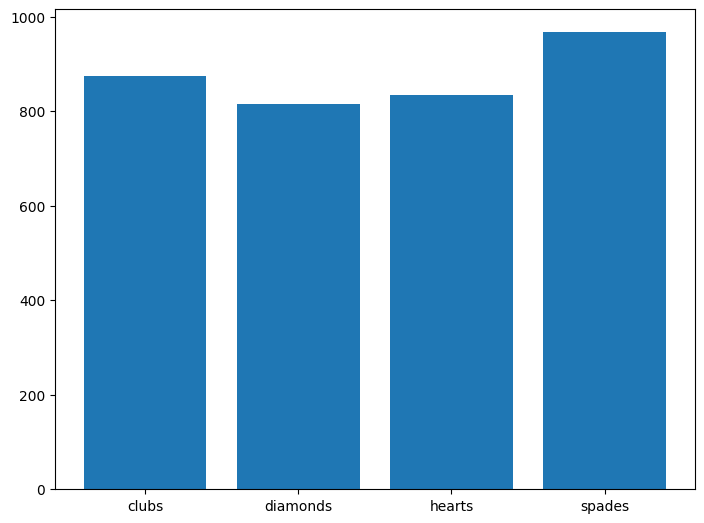

In [19]:
fig = plotter_lib.figure()
class_plot = []
ax = fig.add_axes([0,0,1,1])
class_plot_length = []
for i in os.listdir(data_directory):
    image_data_length = len(os.listdir((str(data_directory) + "//" + i)))
    class_plot.append(i)
    class_plot_length.append(image_data_length)
ax.bar(class_plot,class_plot_length)
plotter_lib.show()



Display sample image

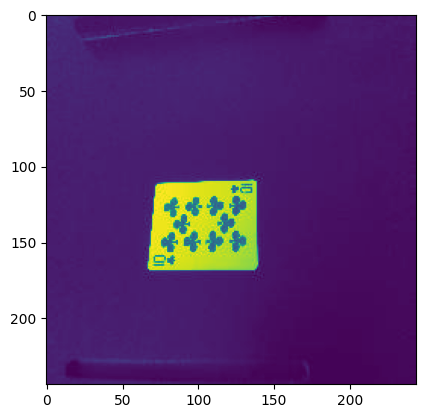

In [20]:
image = imread('just_suits_generate - Copy2/clubs/_0_9779041.jpeg')
#last part of images set to 1 as its greyscaled
images = image.reshape((1, image.shape[0], image.shape[1], 1))
imshow(images[0])
show()

Defining Training Dataset

In [21]:
img_height,img_width=224,224


train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    validation_split=hyp_validation_split,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=hyp_batch)

Found 3489 files belonging to 4 classes.
Using 2792 files for training.


Defining Validation Dataset

In [22]:
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_directory,
    validation_split=hyp_validation_split,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=hyp_batch)


Found 3489 files belonging to 4 classes.
Using 697 files for validation.


In [23]:
print(train_ds)
print(validation_ds)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


Display sample of images and classes

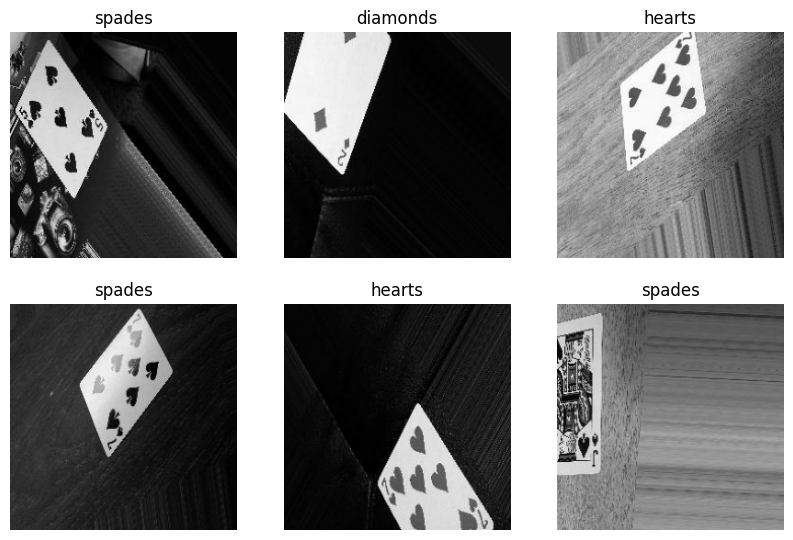

In [24]:
plotter_lib.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for var in range(6):
    ax = plotter_lib.subplot(3, 3, var + 1)
    plotter_lib.imshow(images[var].numpy().astype("uint8"))
    plotter_lib.title(class_names[labels[var]])
    plotter_lib.axis("off")

Creates a pretrained model to categorise the data and then adds our layers to it

In [25]:
resnet_model_ = Sequential()

pretrained_model_for_demo= tf.keras.applications.ResNet50(include_top=False,
  input_shape=(224 ,224 ,3),
  pooling='avg',classes=4,
  weights='imagenet'
  )

for each_layer in pretrained_model_for_demo.layers:
        each_layer.trainable=False

resnet_model_.add(pretrained_model_for_demo)
resnet_model_.add(Flatten())
resnet_model_.add(Dropout(hyp_dropout))
resnet_model_.add(Dense(512, activation='relu'))
resnet_model_.add(Dense(4, activation='softmax'))

In [26]:
resnet_model_.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dropout_1 (Dropout)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               1049088   
                                                                 
 dense_3 (Dense)             (None, 4)                 2052      
                                                                 
Total params: 24,638,852
Trainable params: 1,051,140
Non-trainable params: 23,587,712
_________________________________________________________________


Sets Adam as the optimiser for the code aswell as setting our hyperparamaters and running the network for the given number of epochs

In [27]:
resnet_model_.compile(optimizer=Adam(learning_rate=hyp_learning_rate),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = resnet_model_.fit(train_ds, validation_data=validation_ds, epochs = hyp_epochs)

Epoch 1/10
88/88 [==============================] - 21s 171ms/step - loss: 1.6659 - accuracy: 0.4570 - val_loss: 0.8031 - val_accuracy: 0.7116
Epoch 2/10
88/88 [==============================] - 13s 147ms/step - loss: 0.9166 - accuracy: 0.6103 - val_loss: 0.7233 - val_accuracy: 0.7303
Epoch 3/10
88/88 [==============================] - 13s 149ms/step - loss: 0.8061 - accuracy: 0.6619 - val_loss: 0.6219 - val_accuracy: 0.7776
Epoch 4/10
88/88 [==============================] - 13s 151ms/step - loss: 0.7519 - accuracy: 0.6855 - val_loss: 0.5940 - val_accuracy: 0.7834
Epoch 5/10
88/88 [==============================] - 13s 148ms/step - loss: 0.7184 - accuracy: 0.6952 - val_loss: 0.5476 - val_accuracy: 0.7977
Epoch 6/10
88/88 [==============================] - 13s 146ms/step - loss: 0.6882 - accuracy: 0.7095 - val_loss: 0.5869 - val_accuracy: 0.7432
Epoch 7/10
88/88 [==============================] - 14s 158ms/step - loss: 0.7025 - accuracy: 0.7038 - val_loss: 0.5374 - val_accuracy: 0.7905

plots the accuracy and val_accuracy

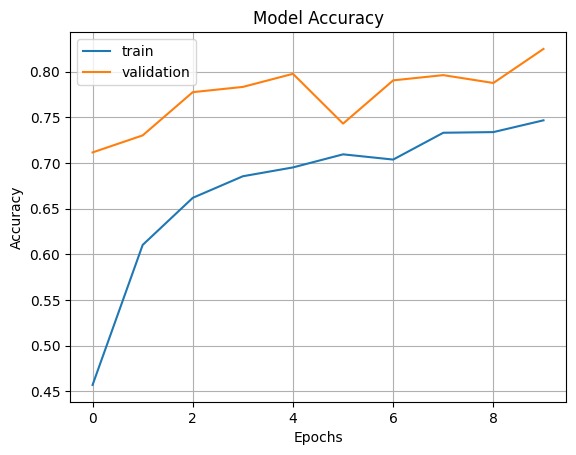

In [28]:
fig1 = plotter_lib.gcf()
plotter_lib.plot(history.history['accuracy'])
plotter_lib.plot(history.history['val_accuracy'])
plotter_lib.grid()
plotter_lib.title('Model Accuracy')
plotter_lib.ylabel('Accuracy')
plotter_lib.xlabel('Epochs')
plotter_lib.legend(['train', 'validation'])
plotter_lib.show()

plots the loss and val_loss

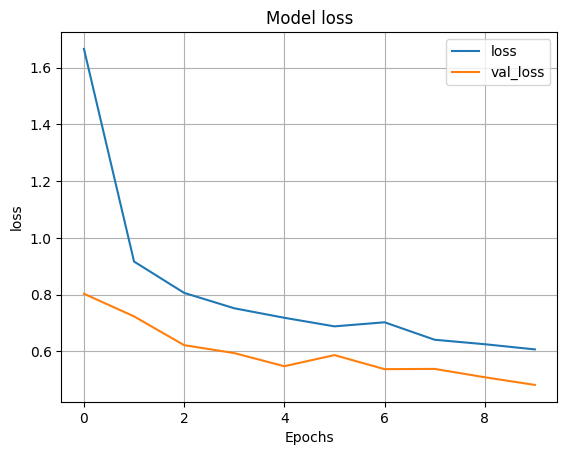

In [29]:
fig2 = plotter_lib.gcf()
plotter_lib.plot(history.history['loss'])
plotter_lib.plot(history.history['val_loss'])
plotter_lib.grid()
plotter_lib.title('Model loss')
plotter_lib.ylabel('loss')
plotter_lib.xlabel('Epochs')
plotter_lib.legend(['loss', 'val_loss'])
plotter_lib.show()

tests the network using data the network has so far now seen

['10C.jpg', '10H.jpg', '10S.jpg', '2H.jpg', '3C.jpg', '4H.jpg', '4S.jpg', '4S_2.jpg', '5C.jpg', '5D.jpg', '5D_2.jpg', '5D_3.jpg', '5H.jpg', '5S.jpg', '6C.jpg', '7C.jpg', '8S..jpg', 'AC.jpg', 'AC_2.jpg', 'AD.jpg', 'AH.jpg', 'AS.jpg', 'JS.jpg', 'KS.jpg', 'QD.jpg']
10C.jpg
1/1 [==============================] - 2s 2s/step
The predicted class is clubs
right!
10H.jpg
1/1 [==============================] - 0s 59ms/step
The predicted class is hearts
right!
10S.jpg
1/1 [==============================] - 0s 51ms/step
The predicted class is spades
right!
2H.jpg
1/1 [==============================] - 0s 53ms/step
The predicted class is hearts
right!
3C.jpg
1/1 [==============================] - 0s 51ms/step
The predicted class is clubs
right!
4H.jpg
1/1 [==============================] - 0s 54ms/step
The predicted class is hearts
right!
4S.jpg
1/1 [==============================] - 0s 45ms/step
The predicted class is spades
right!
4S_2.jpg
1/1 [==============================] - 0s 49ms/step
The p

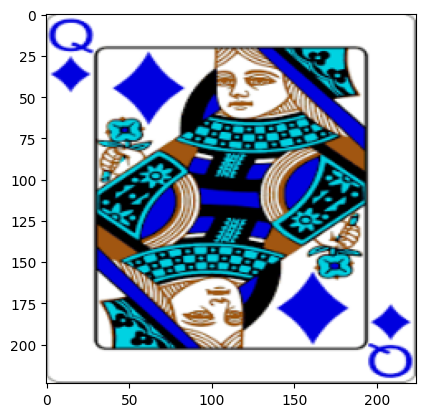

In [30]:
testimages = 'rndmjpg/'
images = os.listdir(testimages)
print(images)
imageclasses = ['clubs','diamonds','hearts','spades']
thisclass = "nothing"
right = 0
wrong = 0
wrongs = []
for i in images:
    
    try:
        print(i)
        sample_image=cv2.imread(testimages + i)
        plotter_lib.imshow(sample_image)
        sample_image_resized= cv2.resize(sample_image, (img_height,img_width))
        plotter_lib.imshow(sample_image_resized)
        sample_image=np.expand_dims(sample_image_resized,axis=0)
        image_pred=resnet_model_.predict(sample_image)
        image_output_class=class_names[np.argmax(image_pred)]
        print("The predicted class is", image_output_class)

        if ('C') in str(i):
            thisclass ="clubs"
        elif ('D') in str(i):
            thisclass ="diamonds"
        elif ('H') in str(i):
            thisclass = "hearts"
        elif ('S') in str(i):
            thisclass = "spades"

        if (thisclass == image_output_class):
            print("right!")
            right = right + 1
        else:
            print("wrong!")
            wrongs.append(i)
            wrong = wrong + 1

    except:
        print(i)
        
print("right = " + str(right) + "/" + str(right+wrong))
print("wrong = " + str(wrong) + "/" + str(right+wrong))
print(wrongs)